In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torch import nn
from collections import Counter
import numpy as np
from model.KAN import KAN
from torch.utils.data import DataLoader
from torchvision import transforms

In [2]:
from dataset import Capture_128
data = Capture_128(root="dataset/Capture_test_128.feather", isTrain=False)
pd.DataFrame(data.samples)

c:\Users\huymo\Documents\KAN\dataset.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.749020
1        0.827451
2        0.619608
3        0.537255
4        0.019608
           ...   
82415    0.090196
82416    0.078431
82417    0.090196
82418    0.090196
82419    0.694118
Name: 0, Length: 82420, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  samples.iloc[:,col] = (feature-min(feature))/(max(feature)-min(feature))
c:\Users\huymo\Documents\KAN\dataset.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0        0.003922
1        0.211765
2        0.360784
3        0.392157
4        0.349020
           ...   
82415    0.011765
82416    0.011765
82417    0.011765
82418    0.011765
82419    0.101961
Name: 1, Length: 82420, dtype: float64' has dtype incompatible with int64, ple

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.749020,0.003922,0.949020,0.247059,0.925490,0.749020,0.650980,0.584314,0.070588,0.450980,...,0.521569,0.792157,0.423529,0.533333,0.780392,0.984314,0.925490,0.352941,0.756863,0.513725
1,0.827451,0.211765,0.466667,0.317647,0.866667,0.796078,0.364706,0.098039,0.145098,0.827451,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.619608,0.360784,0.835294,0.674510,0.556863,0.101961,0.784314,0.882353,0.984314,0.890196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.537255,0.392157,0.996078,0.094118,0.619608,0.913725,0.933333,0.282353,0.858824,0.831373,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.019608,0.349020,0.470588,0.545098,0.384314,0.470588,0.235294,0.541176,0.517647,0.301961,...,0.545098,0.831373,0.749020,0.094118,0.964706,0.956863,0.494118,0.870588,0.941176,0.505882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82415,0.090196,0.011765,0.011765,0.000000,0.647059,0.152941,0.164706,0.529412,0.552941,0.333333,...,0.627451,0.411765,0.117647,0.921569,0.525490,0.686275,0.180392,0.486275,0.035294,0.266667
82416,0.078431,0.011765,0.011765,0.000000,0.003922,0.003922,0.090196,0.011765,0.011765,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
82417,0.090196,0.011765,0.011765,0.000000,0.482353,0.835294,0.803922,0.807843,0.019608,0.039216,...,0.764706,0.203922,0.447059,0.811765,0.447059,0.247059,0.901961,0.125490,0.905882,0.627451
82418,0.090196,0.011765,0.011765,0.019608,0.450980,0.811765,0.196078,0.541176,0.050980,0.807843,...,0.929412,0.627451,0.447059,0.207843,0.015686,0.172549,0.941176,0.098039,0.352941,0.349020


In [7]:
l = data.labels.tolist()
l

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [5]:
pd.DataFrame(data.samples).head(10)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.011765,0.921569,0.686275,0.337255,0.952941,0.152941,0.266667,0.050980,0.094118,0.694118,...,0.298039,0.286275,0.678431,0.203922,0.666667,0.090196,0.541176,0.749020,0.168627,0.552941
1,0.011765,0.921569,0.686275,0.729412,0.164706,0.286275,0.909804,0.298039,0.317647,0.745098,...,0.764706,0.658824,0.623529,0.792157,0.082353,0.603922,0.439216,0.082353,0.337255,0.764706
2,0.011765,0.921569,0.686275,0.772549,0.023529,0.784314,0.474510,0.015686,0.862745,0.333333,...,0.639216,0.733333,0.956863,0.400000,0.650980,0.788235,0.470588,0.960784,0.109804,0.250980
3,0.011765,0.921569,0.686275,0.266667,0.505882,0.207843,0.980392,0.733333,0.494118,0.631373,...,0.584314,0.341176,0.098039,0.839216,0.266667,0.972549,0.027451,0.905882,0.215686,0.196078
4,0.011765,0.921569,0.686275,0.466667,0.486275,0.827451,0.435294,0.933333,0.368627,0.494118,...,0.149020,0.831373,0.376471,0.125490,0.909804,0.819608,0.047059,0.960784,0.682353,0.713725
5,0.011765,0.921569,0.686275,0.937255,0.564706,0.078431,0.219608,0.050980,0.035294,0.517647,...,0.992157,0.196078,0.301961,0.447059,0.847059,0.403922,0.223529,0.725490,0.286275,0.996078
6,0.011765,0.921569,0.686275,0.345098,0.858824,0.901961,0.960784,0.462745,0.717647,0.901961,...,0.639216,0.192157,0.137255,0.796078,0.227451,0.447059,0.788235,0.964706,0.180392,0.792157
7,0.011765,0.921569,0.686275,0.164706,0.662745,0.109804,0.129412,0.607843,0.713725,0.101961,...,0.843137,0.768627,0.862745,0.478431,0.509804,0.949020,0.976471,0.980392,0.149020,1.000000
8,0.835294,0.850980,0.090196,0.588235,0.101961,0.458824,0.564706,0.949020,0.682353,0.784314,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.011765,0.921569,0.686275,0.803922,0.113725,0.525490,0.890196,0.654902,0.941176,0.635294,...,0.525490,0.878431,0.870588,0.705882,0.796078,0.094118,0.462745,0.078431,0.058824,0.690196


In [ ]:
freq = [0 for _ in range(13)]
for i in data.labels:
    freq[i]+=1 
print(freq)

[5660, 3340, 6960, 840, 7400, 4600, 24340, 10180, 1780, 5080, 1020, 3940, 7280]


In [5]:
print(sum(freq)/len(freq))

6340.0


Text(0.5, 1.0, 'Capture_train_128')

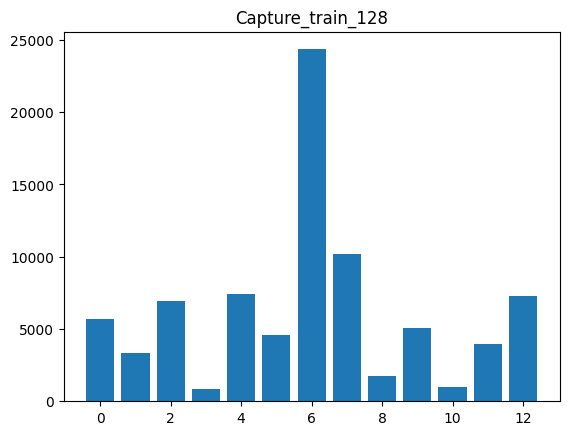

In [4]:
plt.bar(range(0,len(freq),1), freq)
plt.title("Capture_train_128")

In [ ]:
dataset = pd.read_feather('dataset/Capture_test_128.feather')
labels = dataset.iloc [:,-1]
labels.value_counts()

Label
6     24340
7     10180
4      7400
12     7280
2      6960
0      5660
9      5080
5      4600
11     3940
1      3340
8      1780
10     1020
3       840
Name: count, dtype: int64